In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DATADIR = 'data'
game_id = 2

In [3]:
events = mio.read_event_data(DATADIR,game_id)
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

Reading team: home
Reading team: away


Reverse the direction so team attack always on the same side

In [4]:
tracking_home, tracking_away, events = mio.to_single_playing_direction(tracking_home, tracking_away, events)

In [5]:
PLOTDIR = DATADIR

In [6]:
#mviz.save_match_clip(tracking_home.iloc[73600:73600+500], tracking_away.iloc[73600:73600+500], PLOTDIR, fname='home_goal')

Calculating velocities

In [7]:
tracking_home = mvel.calc_player_velocities(tracking_home, smoothing = True, filter_='moving average')
tracking_away = mvel.calc_player_velocities(tracking_away, smoothing = True, filter_='moving average')

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fc77c7db88>)

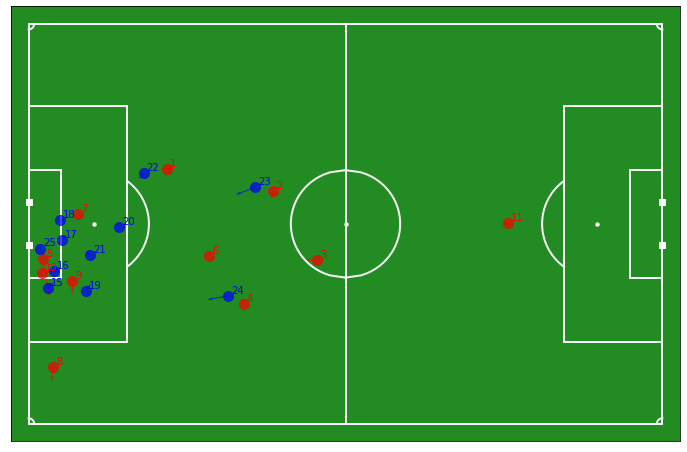

In [8]:
mviz.plot_frame(tracking_home.loc[10000],tracking_away.loc[10000],include_player_velocities=True, annotate=True)

Creation of a physical summary for home players

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fc0036b088>)

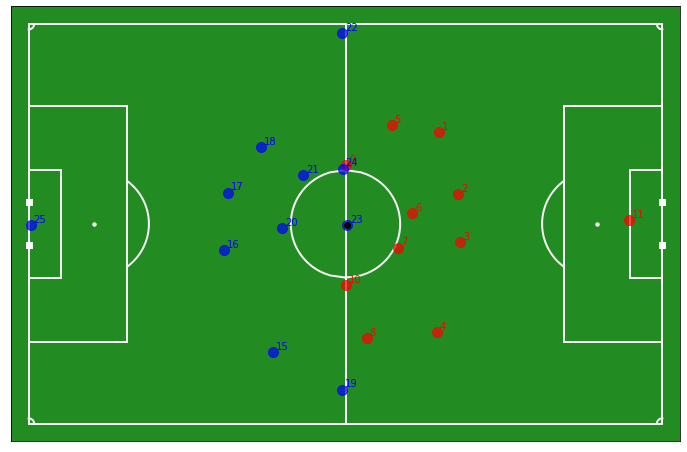

In [9]:
mviz.plot_frame(tracking_home.loc[51],tracking_away.loc[51],include_player_velocities=False, annotate=True)

In [10]:
home_players = np.unique( [ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home' ] )
home_summary = pd.DataFrame(index=home_players) #create the index of the dataframe

Minutes played:

In [11]:
minutes = []
for player in home_players:
    column = 'Home_'+ player + '_x'
    player_minutes = (tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index()+1)/ 25 / 60
    minutes.append(player_minutes)
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending = False)

Distance covered

In [12]:
distance = []
for player in home_summary.index:
    column = 'Home_'+ player + '_speed'
    player_distance = tracking_home[column].sum()/25./1000
    distance.append(player_distance)
home_summary['Distance [km]'] = distance

Text(0, 0.5, 'Distance')

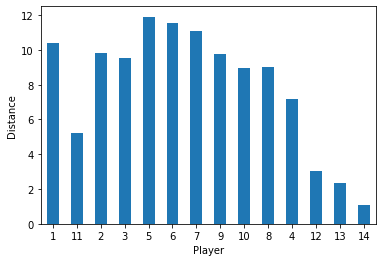

In [13]:
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot = 0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance')

In [14]:
dict_h_s = home_summary.to_dict('index')
dict_h_s

{'1': {'Minutes Played': 94.104, 'Distance [km]': 10.369966157050644},
 '11': {'Minutes Played': 94.104, 'Distance [km]': 5.203819626011546},
 '2': {'Minutes Played': 94.104, 'Distance [km]': 9.84529985940667},
 '3': {'Minutes Played': 94.104, 'Distance [km]': 9.546312457519942},
 '5': {'Minutes Played': 94.104, 'Distance [km]': 11.90918183961342},
 '6': {'Minutes Played': 94.104, 'Distance [km]': 11.535955886050893},
 '7': {'Minutes Played': 94.104, 'Distance [km]': 11.068738595554409},
 '9': {'Minutes Played': 94.104, 'Distance [km]': 9.765224998412652},
 '10': {'Minutes Played': 83.82533333333335,
  'Distance [km]': 8.959440067317818},
 '8': {'Minutes Played': 70.74066666666666,
  'Distance [km]': 9.012902251579554},
 '4': {'Minutes Played': 63.802, 'Distance [km]': 7.177593010938831},
 '12': {'Minutes Played': 30.302666666666667,
  'Distance [km]': 3.0366160258135735},
 '13': {'Minutes Played': 23.363999999999997,
  'Distance [km]': 2.3698907822146293},
 '14': {'Minutes Played': 10

I am gonna use dictionnary instead of list as it is the case in the tutorial.

In [15]:
#adding Walking (<2m/s), Jogging (2<x<4), Running (4<x<7) and sprinting (>7)

In [16]:
for player, attributes in dict_h_s.items():
    column = 'Home_'+player+'_speed'
    attributes['Walking [km]'] = tracking_home.loc[tracking_home[column]<2,column].sum()/25./1000
    attributes['Jogging [km]'] = tracking_home.loc[ (tracking_home[column] >= 2) & (tracking_home[column] < 4), column].sum()/25./1000
    attributes['Running [km]'] = tracking_home.loc[ (tracking_home[column] >= 4) & (tracking_home[column] < 7), column].sum()/25./1000
    attributes['Sprinting [km]'] = tracking_home.loc[tracking_home[column]>=7,column].sum()/25./1000
home_summary = pd.DataFrame.from_dict(dict_h_s, orient = 'index')

In [17]:
home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km]
1,94.104000,10.369966,3.701953,4.436083,2.149219,0.082712
11,94.104000,5.203820,4.394682,0.777765,0.029655,0.001718
2,94.104000,9.845300,4.085937,4.066061,1.612491,0.080811
3,94.104000,9.546312,4.178461,3.832849,1.382836,0.152166
5,94.104000,11.909182,3.583949,4.652462,3.519102,0.153669
6,94.104000,11.535956,3.385540,5.145440,2.829522,0.175454
7,94.104000,11.068739,3.606788,4.956883,2.324597,0.180470
9,94.104000,9.765225,4.428081,3.322470,1.863521,0.151153
10,83.825333,8.959440,3.858442,3.430553,1.404684,0.265760
8,70.740667,9.012902,2.604774,4.133859,2.183218,0.091051


Text(0, 0.5, 'Distance covered [m]')

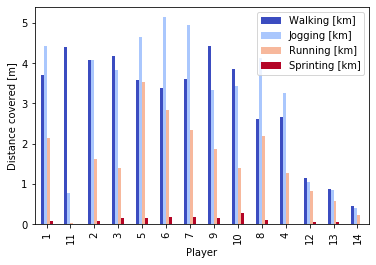

In [18]:
ax = home_summary[['Walking [km]','Jogging [km]','Running [km]','Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')

Lets look at the number of sprints. We consider a sprint when a player keep the speed > 7m/s for more than one second.


In [19]:
# sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
nsprints = []
sprint_threshold = 7 # minimum speed to be defined as a sprint (m/s)
sprint_window = 1*25 # minimum duration sprint should be sustained (in this case, 1 second = 25 consecutive frames)
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
    nsprints.append( np.sum( player_sprints == 1 ) )
home_summary['# sprints'] = nsprints

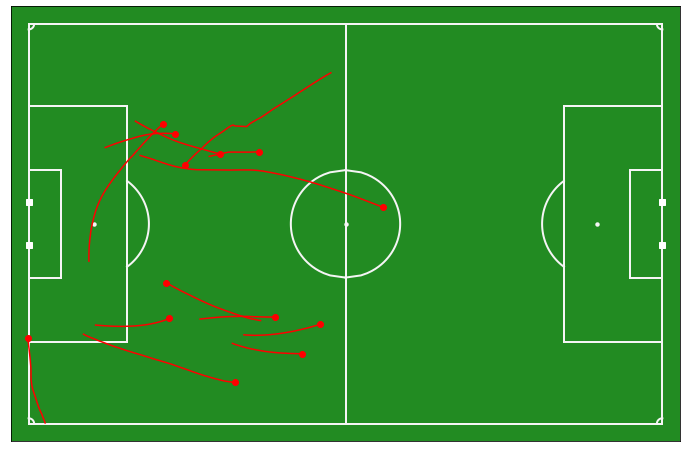

In [20]:
# Plot the trajectories for each of player 10's sprints
player = '10'
column = 'Home_' + player + '_speed' # spped
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position
# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed 
#was above the sprint_threshold
player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold),
                                          np.ones(sprint_window), mode='same' ) >= sprint_window ) )
player_sprints_start = np.where( player_sprints == 1 )[0] - int(sprint_window/2) + 1 #a list of frames that start a sprint
# adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where( player_sprints == -1 )[0] + int(sprint_window/2) + 1 #a list of frames that end a sprint
# now plot all the sprints
fig,ax = mviz.plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(tracking_home[column_x].iloc[s],tracking_home[column_y].iloc[s],'ro')
    ax.plot(tracking_home[column_x].iloc[s:e+1],tracking_home[column_y].iloc[s:e+1],'r')
    

# Homework

- Estimate the top speed of each player

In [21]:
for player, attributes in dict_h_s.items():
    column = 'Home_'+player+'_speed'
    attributes['Top speed [m/s]'] = tracking_home[column].max()
home_summary = pd.DataFrame.from_dict(dict_h_s, orient = 'index')

In [22]:
home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km],Top speed [m/s]
1,94.104000,10.369966,3.701953,4.436083,2.149219,0.082712,10.489778
11,94.104000,5.203820,4.394682,0.777765,0.029655,0.001718,9.953195
2,94.104000,9.845300,4.085937,4.066061,1.612491,0.080811,9.440066
3,94.104000,9.546312,4.178461,3.832849,1.382836,0.152166,10.250773
5,94.104000,11.909182,3.583949,4.652462,3.519102,0.153669,11.039276
6,94.104000,11.535956,3.385540,5.145440,2.829522,0.175454,9.492950
7,94.104000,11.068739,3.606788,4.956883,2.324597,0.180470,8.624472
9,94.104000,9.765225,4.428081,3.322470,1.863521,0.151153,9.250738
10,83.825333,8.959440,3.858442,3.430553,1.404684,0.265760,10.288222
8,70.740667,9.012902,2.604774,4.133859,2.183218,0.091051,11.115750


- Measure player acceleration from the tracking data and estimate the maximum rate of acceleration of each player

In order to measure player acceleration we have to differenciate the speed. We can use the same kind of algorithm that helped us to calculte the speed and adapt it to the rate.

In [51]:
import numpy as np
import scipy.signal as signal

def calc_player_accelerations(team, smoothing=True, filter_='moving average', window=7, polyorder=1, maxacc = 10000):
    """
    Parameters
    -----------
        team: the tracking DataFrame for home or away team
        smoothing: boolean variable that determines whether velocity measures are smoothed. Default is True.
        filter: type of filter to use when smoothing the velocities. Default is Savitzky-Golay, which fits a polynomial of order 'polyorder' to the data within each window
        window: smoothing window size in # of frames
        polyorder: order of the polynomial for the Savitzky-Golay filter. Default is 1 - a linear fit to the velcoity, so gradient is the acceleration
        maxspeed: the maximum speed that a player can realisitically achieve (in meters/second). Speed measures that exceed maxspeed are tagged as outliers and set to NaN. 
        
    Returrns
    -----------
       team : the tracking DataFrame with columns for acc in the x & y direction and total acc added

    """
    # Get the player ids
    player_ids = np.unique( [ c[:-2] for c in team.columns if (c[:4] in ['Home','Away']  and c[-2:]=='_x')])
    # Calculate the timestep from one frame to the next. Should always be 0.04 within the same half
    dt = team['Time [s]'].diff()
    
    # index of first frame in second half
    second_half_idx = team.Period.idxmax(2)
    
    # estimate velocities for players in team
    for player in player_ids: # cycle through players individually
        # difference player positions in timestep dt to get unsmoothed estimate of velicity
        ax = team[player+'_vx'].diff() / dt
        ay = team[player+'_vy'].diff() / dt

        if maxacc>0:
            # remove unsmoothed data points that exceed the maximum speed (these are most likely position errors)
            raw_acc = np.sqrt( ax**2 + ay**2 )
            ax[ raw_acc>maxacc] = np.nan
            ay[ raw_acc>maxacc ] = np.nan
            
        if smoothing:
            if filter_=='Savitzky-Golay': #does not work with NaN
                # calculate first half acceleration
                ax.loc[:second_half_idx] = signal.savgol_filter(ax.loc[:second_half_idx],window_length=window,polyorder=polyorder)
                ay.loc[:second_half_idx] = signal.savgol_filter(ay.loc[:second_half_idx],window_length=window,polyorder=polyorder)        
                # calculate second half acceleration
                ax.loc[second_half_idx:] = signal.savgol_filter(ax.loc[second_half_idx:],window_length=window,polyorder=polyorder)
                ay.loc[second_half_idx:] = signal.savgol_filter(ay.loc[second_half_idx:],window_length=window,polyorder=polyorder)
            elif filter_=='moving average':
                ma_window = np.ones( window ) / window 
                # calculate first half acceleration
                ax.loc[:second_half_idx] = np.convolve( ax.loc[:second_half_idx] , ma_window, mode='same' ) 
                ay.loc[:second_half_idx] = np.convolve( ay.loc[:second_half_idx] , ma_window, mode='same' )      
                # calculate second half acceleration
                ax.loc[second_half_idx:] = np.convolve( ax.loc[second_half_idx:] , ma_window, mode='same' ) 
                ay.loc[second_half_idx:] = np.convolve( ay.loc[second_half_idx:] , ma_window, mode='same' ) 
                
        
        # put player acceleration in x,y direction, and total acceleration back in the data frame
        team[player + "_ax"] = ax
        team[player + "_ay"] = ay
        team[player + "_acceleration"] = np.sqrt( ax**2 + ay**2 )

    return team

In [52]:
tracking_home = calc_player_accelerations(tracking_home, smoothing = True, filter_='moving average')

In [54]:
tracking_home.columns

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y',
       ...
       'Home_11_acceleration', 'Home_12_ax', 'Home_12_ay',
       'Home_12_acceleration', 'Home_13_ax', 'Home_13_ay',
       'Home_13_acceleration', 'Home_14_ax', 'Home_14_ay',
       'Home_14_acceleration'],
      dtype='object', length=116)

In [55]:
for player, attributes in dict_h_s.items():
    column = 'Home_'+player+'_acceleration'
    attributes['Top rate [m/s**2]'] = tracking_home[column].max()
home_summary = pd.DataFrame.from_dict(dict_h_s, orient = 'index')

In [56]:
home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km],Top speed [m/s],Top rate [m/s**2]
1,94.104000,10.369966,3.701953,4.436083,2.149219,0.082712,10.489778,47.162948
11,94.104000,5.203820,4.394682,0.777765,0.029655,0.001718,9.953195,43.972926
2,94.104000,9.845300,4.085937,4.066061,1.612491,0.080811,9.440066,46.181156
3,94.104000,9.546312,4.178461,3.832849,1.382836,0.152166,10.250773,49.365343
5,94.104000,11.909182,3.583949,4.652462,3.519102,0.153669,11.039276,73.502014
6,94.104000,11.535956,3.385540,5.145440,2.829522,0.175454,9.492950,27.705668
7,94.104000,11.068739,3.606788,4.956883,2.324597,0.180470,8.624472,35.364219
9,94.104000,9.765225,4.428081,3.322470,1.863521,0.151153,9.250738,29.687463
10,83.825333,8.959440,3.858442,3.430553,1.404684,0.265760,10.288222,55.630024
8,70.740667,9.012902,2.604774,4.133859,2.183218,0.091051,11.115750,32.884969
